<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros. O objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**


*   Existe relação entre tipo de linha e gravidade do acidente?
*   Acidentes com cargas perigosas tendem a ter mais vítimas?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Existe sazonalidade (mês ou hora) na ocorrência dos acidentes?
*   Existe uma estação do ano com maior número de acidentes?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo de acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

**Importação das Bibliotecas Necessárias e Carga de Dados**

****
As bibliotecas escolhidas e carregadas no código foram fundamentais para realizar uma análise exploratória de dados (EDA), tornando a leitura mais eficiente, possibilitando a manipulação e limpeza, permitindo análises estatisticas e visualizações claras e informativas.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados, tornando a EDA mais fácil de ser compreendida.

Na carga de dados bla bla bla

delimitador csv bla bla bla

mostrando as 5 primeiras linhas
****

In [19]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [27]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
print(df.head().to_string())

  Gravidade Concessionaria Data_Ocorrencia Hora_Ocorrencia  UF                Municipio                       Linha  Quilômetro_Inicial  Quilômetro_Final    Estação_Anterior Estação_Posterior    Perímetro_Urbano                       Causa_direta Causa_contibutiva         Natureza  Interrupção  N_Trem  Prefixo Double_Stack Serviço_Transporte  N_feridos  N_obitos                                                                                      Mercadoria                                                   Equipagem Outra_Ferrovia   PN Prejuízo_Financeiro
0       Sim            FTL      12/01/2020           16:00  PE  Jaboatao dos Guararapes           Tronco Sul Recife               5.000             5.001          Jorge Lins   Entroncamento 1                 Não  Casos Fortuitos ou de Força Maior     Animal na via          Colisão          0.0       0      NaN          NaN                NaN          0         0                                                                           

**Análise e Tratamento de Dados**

****
No bloco abaixo, o codigo "dimensão do dataset", nos ajuda a entender o tamanho do mesmo, trazendo as informações de quantos registros (acidentes) estão presentes e quantas variáveis (atributos) estão disponiveis para análises.

Nas informações do dataset será exibido os tipos de dados de cada coluna; exibe quantos valores não nulos há em cada coluna e ajuda identificar as variaveis categoricas, numericas e possiveis colunas com dados ausentes.

Na verificação de valores nulos veremos a qtde de valores ausentes por coluna e tbm será essencial para decidir se será necessário fazer o tratamento desses dados faltantes.

ajuda a entender se os dados estão com os tipos corretos (int, float, object, etc.).

mostra a distribuição das variáveis quantitativas — pode revelar outliers ou assimetrias
****

Total de linhas: 2973
Total de colunas: 27

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gravidade            2973 non-null   object 
 1   concessionaria       2973 non-null   object 
 2   data_ocorrencia      2973 non-null   object 
 3   hora_ocorrencia      2973 non-null   object 
 4   uf                   2973 non-null   object 
 5   municipio            2973 non-null   object 
 6   linha                2973 non-null   object 
 7   quilometro_inicial   2973 non-null   float64
 8   quilometro_final     2927 non-null   float64
 9   estacao_anterior     2973 non-null   object 
 10  estacao_posterior    2973 non-null   object 
 11  perimetro_urbano     2973 non-null   object 
 12  causa_direta         2973 non-null   object 
 13  causa_contibutiva    2906 non-null   objec

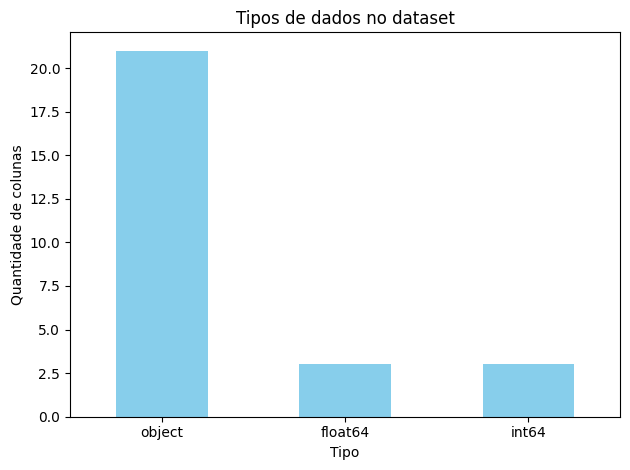


------------------------------------------------------------------------------------------------------------------------------------------------------



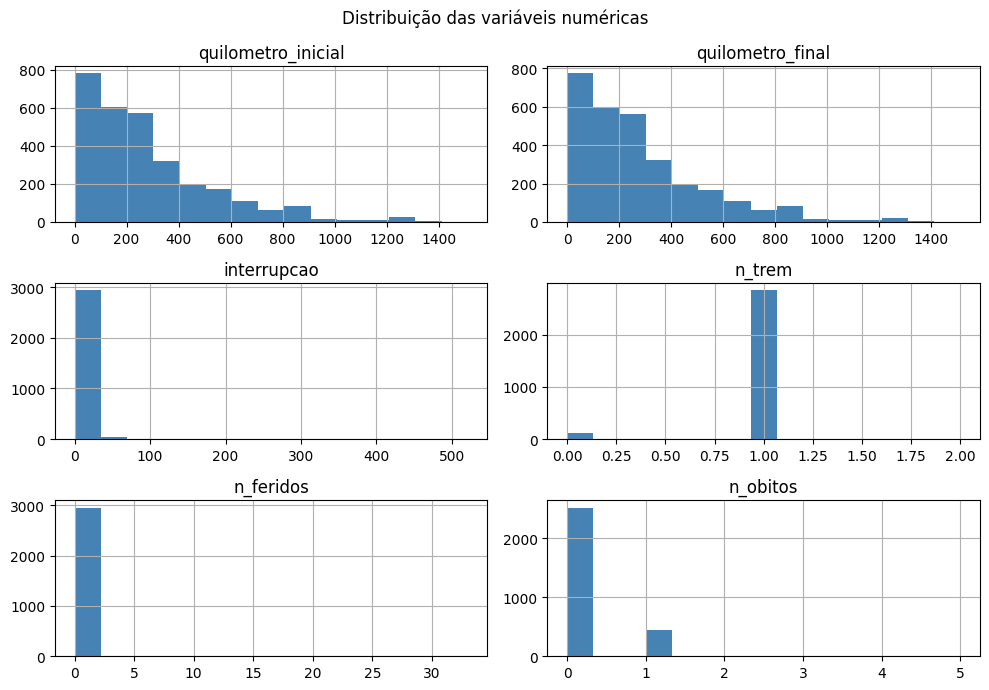

In [30]:
# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

print("\n" + "-"*50 + "\n")

# Informações dos tipos de dados
df.info()

print("\n" + "-"*90 + "\n")

# Gráfico de barras com o tipo de dado por coluna
type_counts = df.dtypes.value_counts()

type_counts.plot(kind='bar', color='skyblue')
plt.title('Tipos de dados no dataset')
plt.xlabel('Tipo')
plt.ylabel('Quantidade de colunas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "-"*150 + "\n")

# Histograma de variáveis numéricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=15,
                 figsize=(10, 7), color='steelblue')
plt.suptitle('Distribuição das variáveis numéricas')
plt.tight_layout()
plt.show()

****
Justificativa:Identificar colunas com dados faltantes permite decidir como tratá-los:Preencher com média, mediana, valor padrão (fillna()),Ou remover linhas/colunas, dependendo da relevância e proporção.

Padronizar os nomes evita erros ao acessar colunas e facilita a automação de análises.Remover acentos e espaços torna o código mais e

Conversão para o tipo datetime permite extrair facilmente informações como ano, mês, dia da semana, etc. errors='coerce': converte valores inválidos em NaT (data ausente), evitando falhas.
****

In [42]:
# Verificação de valores nulos
missing_data = df.isnull().sum().to_frame(name='Total de Nulos')
missing_data['% de Nulos'] = (df.isnull().mean() * 100).round(2)
missing_data = missing_data[missing_data['Total de Nulos'] > 0]
missing_data = missing_data.sort_values(by='Total de Nulos', ascending=False)

print("Tabela de Valores Nulos por Coluna:\n")
print(missing_data)

print("\n" + "-"*50 + "\n")

#Padronização dos nomes das colunas
df.columns = (df.columns
              .str.strip()                     # Remove espaços no início/fim
              .str.lower()                     # Converte para minúsculas
              .str.replace(' ', '_')           # Substitui espaços por underline
              .str.normalize('NFKD')           # Remove acentuação
              .str.encode('ascii', errors='ignore')
              .str.decode('utf-8'))

# Exibe colunas
print("Lista de Atributos do Dataset:\n")
for col in df.columns:
    print(col)

print("\n" + "-"*50 + "\n")

# Remoção de duplicatas
print("\nDuplicatas encontradas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\n" + "-"*50 + "\n")

# Conversão da coluna de data_ocorrencia
try:
    # Conversão da coluna para datetime
    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], errors='coerce', dayfirst=True)

    print("\nColuna 'data_ocorrencia' convertida com sucesso para datetime.")
    print(df['data_ocorrencia'].head())  # Exibe os primeiros valores

except KeyError:
    print("\nA coluna 'data_ocorrencia' não foi encontrada no DataFrame.")




Tabela de Valores Nulos por Coluna:

                     Total de Nulos  % de Nulos
outra_ferrovia                 2856       96.06
prejuizo_financeiro            1815       61.05
mercadoria                      236        7.94
equipagem                       127        4.27
prefixo                         126        4.24
servico_transporte              120        4.04
double_stack                    120        4.04
causa_contibutiva                67        2.25
quilometro_final                 46        1.55

--------------------------------------------------

Lista de Atributos do Dataset:

gravidade
concessionaria
data_ocorrencia
hora_ocorrencia
uf
municipio
linha
quilometro_inicial
quilometro_final
estacao_anterior
estacao_posterior
perimetro_urbano
causa_direta
causa_contibutiva
natureza
interrupcao
n_trem
prefixo
double_stack
servico_transporte
n_feridos
n_obitos
mercadoria
equipagem
outra_ferrovia
pn
prejuizo_financeiro

--------------------------------------------------


Dup

**Estatísticas Descritivas**

****
A análise descritiva mostra que a variável N_feridos possui uma média de X e desvio padrão de Y, indicando uma variação significativa entre os registros. Já a variável Estado possui 27 valores únicos, sendo SP o mais frequente, com Z ocorrências, o que sugere uma maior concentração de acidentes nesse estado.

Além disso, a coluna Tipo_Carga apresenta alta cardinalidade, com várias categorias distintas, o que pode impactar futuras análises ou classificações. Já colunas como N_obitos têm valores muito baixos na média, indicando que a maioria dos acidentes não resultam em mortes, mas ainda assim há casos extremos (outliers), como indicado pelos valores máximos.
****


In [44]:
# Estatísticas descritivas
# Armazena a descrição em uma variável
desc = df.describe(include='all').transpose()
# Ajusta a visualização para mostrar todas as colunas no terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print("Estatísticas descritivas por coluna:\n")
    print(desc)

Estatísticas descritivas por coluna:

                      count unique                                                                                           top  freq                           mean                  min                  25%                  50%                  75%                  max         std
gravidade              2973      2                                                                                           Não  1596                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN         NaN
concessionaria         2973     13                                                                                           RMS   858                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN         NaN
data_ocorrencia        2973    NaN                                                                               